In [28]:
import numpy as np
import cv2
import random
import os
import matplotlib.pyplot as plt

from utils import resizeImage, makeImageSquare

Load image

In [29]:
image_dir = "C:\\Users\\giant\\Desktop\\aiptasia\\data\\water_body_data\\Images"
mask_dir = "C:\\Users\\giant\\Desktop\\aiptasia\\data\\water_body_data\\Masks"
num_images = len(os.listdir(image_dir))
img_idx = random.sample(list(range(num_images)), k=1)[0]
# test_img_name = sorted(os.listdir(image_dir))[img_idx]
test_img_name = "water_body_1113.jpg"
test_img = cv2.imread(filename=os.path.join(image_dir, test_img_name))
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB) #converting to RGB


In [30]:
mask = cv2.imread(os.path.join(mask_dir, test_img_name), cv2.IMREAD_GRAYSCALE)
mask.shape

(564, 334)

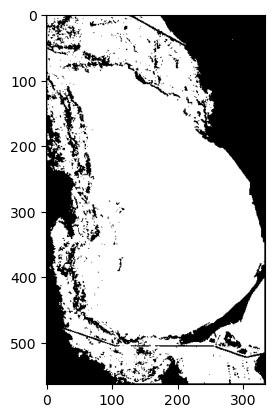

In [31]:
(thresh, im_bw) = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
im_bw[im_bw == 255] = 1 #converting to binary 0, 1  
plt.imshow(im_bw, cmap='binary_r')
plt.show()

In [38]:
im_bw[im_bw == 255] = 1
im_bw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(564, 334, 3)


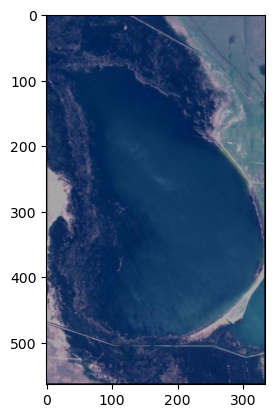

In [32]:
print(test_img.shape)
plt.imshow(test_img)
plt.show()

Resize the longest side

(256, 151, 3)


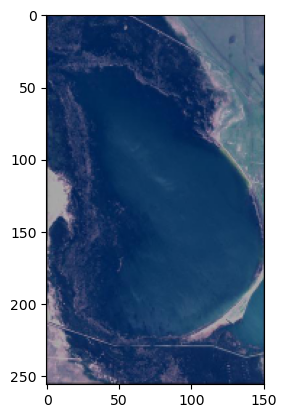

In [33]:
size = 256
resized_img = resizeImage(img=test_img, size=size)

print(resized_img.shape)
plt.imshow(resized_img)
plt.show()

Make image square

(256, 256, 3)


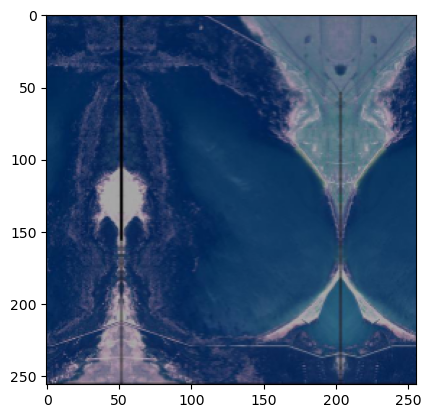

In [34]:
square_img = makeImageSquare(img=resized_img, size=size)

print(square_img.shape)
plt.imshow(square_img)
plt.show()

Setting up data loading
- Make use of PyTorch's `random_split` to get train/test/val splits
- 